| <p style="text-align: left;">Name</p>               | Matr.Nr. | <p style="text-align: right;">Date</p> |
| --------------------------------------------------- | -------- | ------------------------------------- |
| <p style="text-align: left">Lion DUNGL</p> | 01553060 | 15.12.2019                            |

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 4 (Assignment) -- Your first neural networks </h2>

Authors: Brandstetter, Schäfl, Patil <br>
Date: 20-11-2019

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies 
to all code within this file.

Copyright statement: <br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules/symbols:

- <code>u4_utils</code>
- <code>matplotlib.pyplot</code>
- <code>numpy</code>
- <code>torch</code>
- <code>torch.nn</code>

In [1]:
%matplotlib notebook

In [2]:
import u4_utils as u4
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings(r'ignore')

Afterwards, check if the <code>torch</code> module was correctly imported, by computing the <i>sum</i> of <code>[7, 2, 3]</code> and printing the result.

In [3]:
torch.sum(torch.as_tensor([7, 2, 3], dtype=torch.float32))

tensor(12.)

# Exercise 1
Normally, machine learning specific tasks start with digging into some <i>data set</i>. This time, we want to emphasize a different approach by focusing on miscellaneous kinds of <i>functions</i> at the beginning. <b>Exercise 1</b> is all about

- <i>convex</i> functions

and how their <i>derivative</i> can be used for optimizing the same. So, your <b>first task</b> of this exercise requires you to perform the following steps:

- Define&emsp;$y = x^{d}_{0} + x^{d}_{1} + \ldots{} + x^{d}_{n}$&emsp;as a <i>Python</i> function.
- Define the corresponding <i>derivative</i> as a <i>Python</i> function.

Note, that both <i>Python</i> functions should accept <i>exactly one</i> mandatory parameter, namely some one dimensional <i>numpy array</i> consisting of real values. Regardless of this requirement, optional parameters are allowed, though (e.g. to specify the corresponding <i>degree</i> of the current function of interest).

In [4]:
def f(x, d:int=2):
    y = 0
    for i in x:
        y += np.power(i, d)
    return np.array(y)

In [5]:
# gradient = d * x^(d-1)

def gradient_f(x, d:int=2):
    y = []
    for i in x:
        y.append(d*np.power(i, (d-1)))
    return np.array(y)

After you have <i>implemented</i> said function as well as the corresponding derivative, we want to visualize both to get more familiar with them as well as to get some <i>feeling</i> for their behaviour. Most often, some kind of visualization vastly supports problem finding processes (often termed as <i>debugging</i>), so keep this always in mind.

- Create two <i>numpy arrays</i> with values in the range of $[-2, 2]$, with a step size of $0.1$ (<i>hint:</i> look at <code>arange</code> supplied by <i>numpy</i>).
- Visualize the <i>convex</i> function as well as its <i>derivative</i> in $(1.2\ \ 1.5)$.

<IPython.core.display.Javascript object>


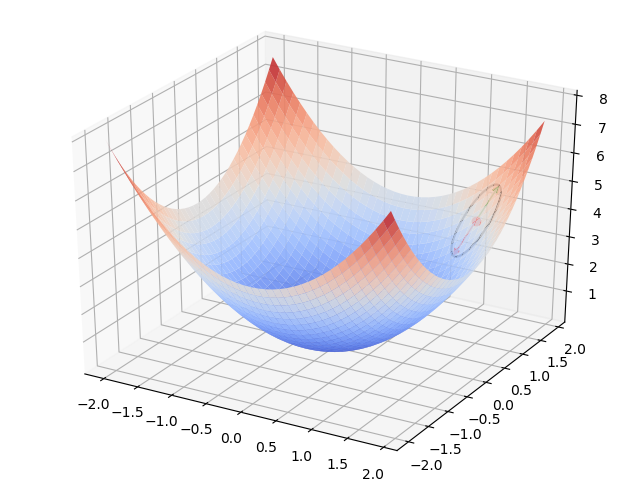

In [6]:
x0 = np.array([1.2, 1.5])
x_1 = np.arange(-2, 2, 0.1)
x_2 = np.arange(-2, 2, 0.1)

u4.plot_function(x0, x_1, x_2, f, gradient_f)

As the <b>second</b> and <b>last task</b> of this exercise, we want to know the <i>exact</i> value of the <i>derivative</i> of some <i>result</i> of the convex function with respect to its <i>input</i>. For this to happen, the following steps are required:

- Transform the list $[1.2, 1.5]$ to a <i>numpy array</i> of type <i>float32</i>.
- Compute the <i>result</i> of the <i>convex</i> function applied to said newly created <i>input</i>
- Compute the <i>derivative</i> of the <i>result</i> with respect to the input.

Print the <i>result</i> as well as all <i>intermediate</i> values to the standard output.

In [7]:
inp = np.array([1.2, 1.5], dtype=np.float32)
inp_f = f(inp)
inp_grad = gradient_f(inp)

print(f"result: {inp_f}\ngradient of x_1: {inp_grad[0]}, gradient of x_2: {inp_grad[1]}")

result: 3.6900001144409202
gradient of x_1: 2.4000000953674316, gradient of x_2: 3.0


# Exercise 2


This exercise is quite similar to the <i>previous</i> one, with a difference in the type of functions to be analyzed. <b>Exercise 2</b> is all about

- <i>non-convex</i> functions

and how their <i>derivative</i> can be used for optimizing the same. So, your <b>first task</b> of this exercise requires you to perform the following steps:

- Define&emsp;$y = \tanh\left(x^{d}_{0} + x^{d}_{1} + \ldots{} + x^{d}_{n}\right)$&emsp;as a <i>Python</i> function.
- Define the corresponding <i>derivative</i> as a <i>Python</i> function.

Note, that both <i>Python</i> functions should accept <i>exactly one</i> mandatory parameter, namely some one dimensional <i>numpy array</i> consisting of real values. Regardless of this requirement, optional parameters are allowed, though (e.g. to specify the corresponding <i>degree</i> of the current function of interest).

In [8]:
def f_2(x, d:int=2):
    y = 0
    for i in x:
        y += np.power(i, d)
    return np.array(np.tanh(y))

In [9]:
def sech(x):
    return (1/np.cosh(x))

In [10]:
# gradient = d * x^(d-1) * sech²(x^d + x_1^d + x_2^d + ... + x_n^d)

def gradient_f_2(x, d:int=2):
    y = []
    for i in x:
        y.append(d*np.power(i, (d-1))*np.power(sech(f(x, d)), 2))
    return np.array(y)

After you have <i>implemented</i> said function as well as the corresponding derivative, we want to visualize both to get more familiar with them as well as to get some <i>feeling</i> for their behaviour.

- Create two <i>numpy arrays</i> with values in the range of $[-2, 2]$, with a step size of $0.1$ (<i>hint:</i> look at <code>arange</code> supplied by <i>numpy</i>).
- Visualize the <i>non-convex</i> function as well as its <i>derivative</i> in $(0.9\ \ 0.9)$.

The input of the <i>non-convex</i> function is in the same range as the input of the <i>convex</i> one. Nonetheless, their result (and so does their visualization) might differ. Do you notice any major <i>differences</i>? If you do, briefly describe them, otherwise leave a short notice.

<IPython.core.display.Javascript object>


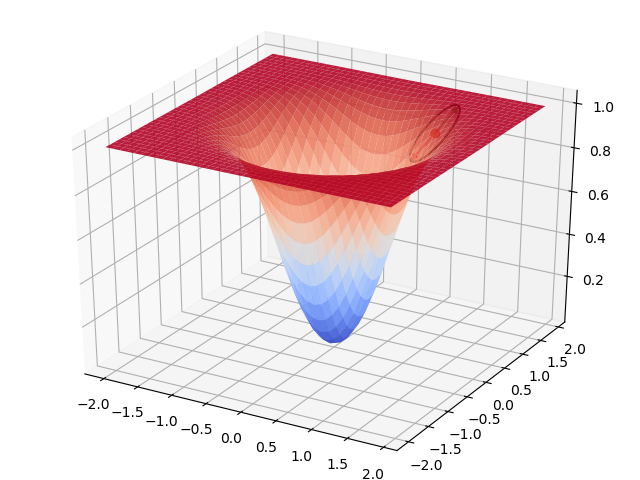

In [11]:
x0 = np.array([0.9, 0.9])
x_1 = np.arange(-2, 2, 0.1)
x_2 = np.arange(-2, 2, 0.1)

u4.plot_function(x0, x_1, x_2, f_2, gradient_f_2)

# Answer
- The tanh-function changes from convex to concave while the polynomial function stays convex all the time.
- Furthermore, the tahh-function is narrower (I mean "schmäler"), the polynomial function look wider (I mean "breiter").
- One can also observe that the range of the tanh-function reaches from 0 to 1 (*). Because of this, this function can be used in logistic regression. The range of the convex function on the other hand reaches from 0 to infinity.
- Both functions have, in this particular case, only one global minimum.

(*) because of that, the value of the gradient for all points after the function-value has reached z = 1 should be 0, but for some reason in the plot those areas are colored red. When manually computing the gradient-values for points in this area, the function correctly returns approximately 0 (see below).

In [12]:
x_test = [2, 3]
print(gradient_f_2(x_test))

[8.17454244e-11 1.22618137e-10]


Similar to the <i>last tasl</i> of the <i> previous</i> exercise, the <b>second</b> and <b>last task</b> of this one requires you tocompute the <i>exact</i> value of the <i>derivative</i> of some <i>result</i> of the non-convex function with respect to its <i>input</i>. For this to happen, the following steps are necessary:

- Transform the list $[0.9, 0.9]$ to a <i>numpy array</i> of type <i>float32</i>.
- Compute the <i>result</i> of the <i>non-convex</i> function applied to said newly created <i>input</i>
- Compute the <i>derivative</i> of the <i>result</i> with respect to the input.

Print the <i>result</i> as well as all <i>intermediate</i> values to the standard output.

In [13]:
inp = np.array([0.9, 0.9], dtype=np.float32)
inp_f = f_2(inp)
inp_grad = gradient_f_2(inp)

print(f"result: {inp_f}\ngradient of x_1: {inp_grad[0]}, gradient of x_2: {inp_grad[1]}")

result: 0.9246242065313247
gradient of x_1: 0.2611261311358922, gradient of x_2: 0.2611261311358922


# Exercise 3

As you are now an expert in <i>convex</i> and <i>non-convex</i> functions, you would for sure happily get your hands dirty by applying your knowledge to some data set. In this exercise you will be working with one composed of various <i>images</i> of fashion items. For curious minds, more information regarding this data set can be found at:

<cite>Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747</cite>

For the <b>first task</b> of this exercise you are required to perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>Fashion-MNIST</i> data set (returns the <i>training</i> as well as the <i>test</i> set).
- Display the first <i>eight</i> images of the <i>Fashion-MNIST</i> data set.

Can you identify possible <i>labels</i> of the eight images?

In [14]:
torch.manual_seed(42)
train_set, test_set = u4.load_fashion_mnist()

<IPython.core.display.Javascript object>


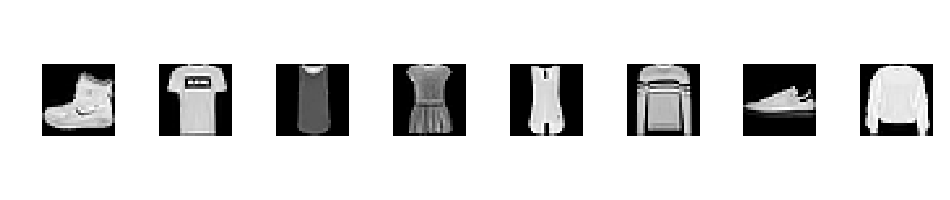

In [15]:
u4.display_FashionMNIST(train_set)

In order to define a <i>logistic regression</i> model as well as a <i>dense feedforward neural network</i> for identifying images as visualized above, some minimal knowledge about the <i>structure</i> of the images is required:

- Find out the <i>input dimensionality</i> of the data set.
- Set the output dimensionality to be $d_{out} = 10$

In [16]:
train_image_zero, train_target_zero = train_set[0]

input_dim = train_image_zero.shape[0] * train_image_zero.shape[1] * train_image_zero.shape[2]
output_dim = 10

print(f"Input dimensionality: {input_dim}")

Input dimensionality: 784


Last time (for <i>assignment 3</i>) you were supplied with an implementation of <i>logistic regression</i> by us. As this would be too simple (and obviosuly no <i>fun</i> at all) for you, the <b>second task</b> of this exercise comprises:

- Implement a <i>Python class</i> <code>LogisticRegression</code> as discussed during the lecture.
- Keep in mind, which <i>activation</i> function a <i>multi-class</i> setting requires.
- Optionally, <i>initialize</i> the parameters of the model in a different way.

In [17]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.n_classes = 10
        self.linear = nn.Linear(784, self.n_classes)

    def forward(self, x):
        out = self.linear(x)
        return u4.F.log_softmax(out, dim=1)
    
# Optional initialization with variable input- and output-dimensions passed to the class as parameters
class LogisticRegression_opt(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression_opt, self).__init__()
        self.n_classes = output_dim
        self.linear = nn.Linear(input_dim, self.n_classes)

    def forward(self, x):
        out = self.linear(x)
        return torch.softmax(out, dim=1)

Moreover, define an <i>instance</i> of the type <code>SimpleNamespace</code>, and set the hyperparameters accordingly:

- <code>batch_size = 64</code>
- <code>test_batch_size = 1000</code>
- <code>epochs = 10</code>
- <code>lr = 0.001</code>
- <code>momentum = 0.9</code>

The field <code>log_interval</code> can be chosen freely.

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Create additional instances of <code>DataLoader</code> for the <i>training</i> as well as the <i>test set</i> and enable <i>shuffling</i>.
- Create a <i>logistic regression</i> model using your <i>own</i> implementation, using the proper <i>input</i> and <i>output</i> dimensionalities.
- Create an optimizer of the type <code>SGD</code> and initialize it accordingly.

In [18]:
args00 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10,
                       lr=0.001, momentum=0.9, seed=42, log_interval=100)

torch.manual_seed(args00.seed)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=args00.batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=args00.test_batch_size, shuffle=True)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [19]:
model_1 = LogisticRegression()

optimizer = u4.optim.SGD(model_1.parameters(), lr=args00.lr, momentum=args00.momentum)

Train the previously defined <i>logistic regression</i> model by applying the corresponding <i>data loader</i> (keep in mind for which set we want the model to be <i>trained</i>) as well as the <i>optimizer</i>. Report the performance on the <i>test set</i> afterwards. Experiment with different hyperparameter settings, for instance set different values for $\ldots$

- $\ldots$ the learning rate <code>lr</code>.
- $\ldots$ the momentum term <code>momentum</code>.
- $\ldots$ the amount of epochs <code>epochs</code>.

Do you notice any serious differences? If yes, which <i>settings</i> lead to them? If not, try to argue about a <i>possible</i> reason.

In [20]:
for epoch in range(1, args00.epochs + 1):
    u4.train(args00, model_1, device, train_loader, optimizer, epoch, input_dim)
    u4.test(args00, model_1, device, test_loader, input_dim)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.337412
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.037149
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.935071
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.747762
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.815138
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.740047
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.841849
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.666639
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.682458
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.684284

Test set: Average loss: 0.0007, Accuracy: 7558/10000 (75.58%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.639270
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.608746
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.735206
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.735563
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.708713
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.628394
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.591990
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.616346
Train Epoch: 02 [57

In [21]:
def training(args):
    model = LogisticRegression().to(device)
    optimizer = u4.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
    
    for epoch in range(1, args.epochs + 1):
        u4.train(args, model, device, train_loader, optimizer, epoch, input_dim)
        u4.test(args, model, device, test_loader, input_dim)
    
    return model

In [22]:
# lr = 0.0000000001

args01 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.0000000001, momentum=0.9, log_interval=100)
model1_01 = training(args01)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 2.307746
Train Epoch: 01 [12800/60000 (21%)]	Loss: 2.274126
Train Epoch: 01 [19200/60000 (32%)]	Loss: 2.263104
Train Epoch: 01 [25600/60000 (43%)]	Loss: 2.344251
Train Epoch: 01 [32000/60000 (53%)]	Loss: 2.281995
Train Epoch: 01 [38400/60000 (64%)]	Loss: 2.319780
Train Epoch: 01 [44800/60000 (75%)]	Loss: 2.297722
Train Epoch: 01 [51200/60000 (85%)]	Loss: 2.268258
Train Epoch: 01 [57600/60000 (96%)]	Loss: 2.335963
Train Epoch: 01 [60000/60000 (100%)]	Loss: 2.352999

Test set: Average loss: 0.0023, Accuracy: 819/10000 (8.19%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 2.263938
Train Epoch: 02 [12800/60000 (21%)]	Loss: 2.331422
Train Epoch: 02 [19200/60000 (32%)]	Loss: 2.257754
Train Epoch: 02 [25600/60000 (43%)]	Loss: 2.354842
Train Epoch: 02 [32000/60000 (53%)]	Loss: 2.263884
Train Epoch: 02 [38400/60000 (64%)]	Loss: 2.313909
Train Epoch: 02 [44800/60000 (75%)]	Loss: 2.298142
Train Epoch: 02 [51200/60000 (85%)]	Loss: 2.311939
Train Epoch: 02 [5760

In [23]:
# lr = 1

args02 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=1, momentum=0.9, log_interval=100)
model1_02 = training(args02)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 5.557391
Train Epoch: 01 [12800/60000 (21%)]	Loss: 11.611691
Train Epoch: 01 [19200/60000 (32%)]	Loss: 11.177045
Train Epoch: 01 [25600/60000 (43%)]	Loss: 7.127173
Train Epoch: 01 [32000/60000 (53%)]	Loss: 4.563308
Train Epoch: 01 [38400/60000 (64%)]	Loss: 2.189511
Train Epoch: 01 [44800/60000 (75%)]	Loss: 8.002171
Train Epoch: 01 [51200/60000 (85%)]	Loss: 4.092964
Train Epoch: 01 [57600/60000 (96%)]	Loss: 4.100695
Train Epoch: 01 [60000/60000 (100%)]	Loss: 8.821426

Test set: Average loss: 0.0070, Accuracy: 7427/10000 (74.27%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 4.417450
Train Epoch: 02 [12800/60000 (21%)]	Loss: 9.725554
Train Epoch: 02 [19200/60000 (32%)]	Loss: 6.552876
Train Epoch: 02 [25600/60000 (43%)]	Loss: 2.646058
Train Epoch: 02 [32000/60000 (53%)]	Loss: 2.901127
Train Epoch: 02 [38400/60000 (64%)]	Loss: 4.347022
Train Epoch: 02 [44800/60000 (75%)]	Loss: 5.662318
Train Epoch: 02 [51200/60000 (85%)]	Loss: 2.020548
Train Epoch: 02 [

In [24]:
# lr = 10000

args03 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=10000, momentum=0.9, log_interval=100)
model1_03 = training(args03)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 131916.187500
Train Epoch: 01 [12800/60000 (21%)]	Loss: 63154.113281
Train Epoch: 01 [19200/60000 (32%)]	Loss: 40037.437500
Train Epoch: 01 [25600/60000 (43%)]	Loss: 72692.671875
Train Epoch: 01 [32000/60000 (53%)]	Loss: 31380.621094
Train Epoch: 01 [38400/60000 (64%)]	Loss: 62366.523438
Train Epoch: 01 [44800/60000 (75%)]	Loss: 83932.210938
Train Epoch: 01 [51200/60000 (85%)]	Loss: 51541.140625
Train Epoch: 01 [57600/60000 (96%)]	Loss: 45566.023438
Train Epoch: 01 [60000/60000 (100%)]	Loss: 75112.000000

Test set: Average loss: 49.2839, Accuracy: 7884/10000 (78.84%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 84799.265625
Train Epoch: 02 [12800/60000 (21%)]	Loss: 108932.570312
Train Epoch: 02 [19200/60000 (32%)]	Loss: 35789.765625
Train Epoch: 02 [25600/60000 (43%)]	Loss: 129385.898438
Train Epoch: 02 [32000/60000 (53%)]	Loss: 44126.410156
Train Epoch: 02 [38400/60000 (64%)]	Loss: 99965.093750
Train Epoch: 02 [44800/60000 (75%)]	Loss: 58391.67968

In [25]:
# epochs = 1

args04 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1, lr=0.001, momentum=0.9, log_interval=100)
model1_04 = training(args04)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.269734
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.016648
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.900072
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.808669
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.944500
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.801762
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.719605
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.777478
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.686418
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.543089

Test set: Average loss: 0.0007, Accuracy: 7617/10000 (76.17%)



In [26]:
# epochs = 5

args05 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5, lr=0.001, momentum=0.9, log_interval=100)
model1_05 = training(args05)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.367178
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.035954
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.190005
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.812021
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.769355
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.753342
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.773622
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.728551
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.678018
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.537080

Test set: Average loss: 0.0007, Accuracy: 7534/10000 (75.34%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.756860
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.600542
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.562267
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.762686
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.579090
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.775893
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.673263
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.673949
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [27]:
# epochs = 20

args06 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=20, lr=0.001, momentum=0.9, log_interval=100)
model1_06 = training(args06)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.412483
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.121667
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.921844
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.729134
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.928237
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.760622
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.941036
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.670755
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.627844
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.607556

Test set: Average loss: 0.0007, Accuracy: 7635/10000 (76.35%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.664013
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.760343
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.735331
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.634828
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.542781
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.573285
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.466825
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.858386
Train Epoch: 02 [57

Train Epoch: 15 [32000/60000 (53%)]	Loss: 0.421454
Train Epoch: 15 [38400/60000 (64%)]	Loss: 0.355363
Train Epoch: 15 [44800/60000 (75%)]	Loss: 0.507606
Train Epoch: 15 [51200/60000 (85%)]	Loss: 0.285989
Train Epoch: 15 [57600/60000 (96%)]	Loss: 0.427156
Train Epoch: 15 [60000/60000 (100%)]	Loss: 0.385435

Test set: Average loss: 0.0005, Accuracy: 8298/10000 (82.98%)

Train Epoch: 16 [6400/60000 (11%)]	Loss: 0.746750
Train Epoch: 16 [12800/60000 (21%)]	Loss: 0.426022
Train Epoch: 16 [19200/60000 (32%)]	Loss: 0.364291
Train Epoch: 16 [25600/60000 (43%)]	Loss: 0.438054
Train Epoch: 16 [32000/60000 (53%)]	Loss: 0.416096
Train Epoch: 16 [38400/60000 (64%)]	Loss: 0.448813
Train Epoch: 16 [44800/60000 (75%)]	Loss: 0.526680
Train Epoch: 16 [51200/60000 (85%)]	Loss: 0.309016
Train Epoch: 16 [57600/60000 (96%)]	Loss: 0.513943
Train Epoch: 16 [60000/60000 (100%)]	Loss: 0.370814

Test set: Average loss: 0.0005, Accuracy: 8294/10000 (82.94%)

Train Epoch: 17 [6400/60000 (11%)]	Loss: 0.579670
Train

In [28]:
# momentum = 0.00000001

args07 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.00000001, log_interval=100)
model1_07 = training(args07)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 2.080074
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.874467
Train Epoch: 01 [19200/60000 (32%)]	Loss: 1.857727
Train Epoch: 01 [25600/60000 (43%)]	Loss: 1.707209
Train Epoch: 01 [32000/60000 (53%)]	Loss: 1.598081
Train Epoch: 01 [38400/60000 (64%)]	Loss: 1.487549
Train Epoch: 01 [44800/60000 (75%)]	Loss: 1.389652
Train Epoch: 01 [51200/60000 (85%)]	Loss: 1.405498
Train Epoch: 01 [57600/60000 (96%)]	Loss: 1.357618
Train Epoch: 01 [60000/60000 (100%)]	Loss: 1.391683

Test set: Average loss: 0.0014, Accuracy: 6474/10000 (64.74%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 1.334008
Train Epoch: 02 [12800/60000 (21%)]	Loss: 1.254566
Train Epoch: 02 [19200/60000 (32%)]	Loss: 1.301014
Train Epoch: 02 [25600/60000 (43%)]	Loss: 1.217491
Train Epoch: 02 [32000/60000 (53%)]	Loss: 1.205732
Train Epoch: 02 [38400/60000 (64%)]	Loss: 1.131888
Train Epoch: 02 [44800/60000 (75%)]	Loss: 1.187217
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.992813
Train Epoch: 02 [57

In [29]:
# momentum = 0.5

args08 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.5, log_interval=100)
model1_08 = training(args08)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.907163
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.677146
Train Epoch: 01 [19200/60000 (32%)]	Loss: 1.464914
Train Epoch: 01 [25600/60000 (43%)]	Loss: 1.360423
Train Epoch: 01 [32000/60000 (53%)]	Loss: 1.289351
Train Epoch: 01 [38400/60000 (64%)]	Loss: 1.245036
Train Epoch: 01 [44800/60000 (75%)]	Loss: 1.140389
Train Epoch: 01 [51200/60000 (85%)]	Loss: 1.030782
Train Epoch: 01 [57600/60000 (96%)]	Loss: 1.123778
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.979023

Test set: Average loss: 0.0011, Accuracy: 6763/10000 (67.63%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 1.144345
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.907895
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.862100
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.964058
Train Epoch: 02 [32000/60000 (53%)]	Loss: 1.060964
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.948967
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.904368
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.931971
Train Epoch: 02 [57

In [30]:
# momentum = 0.999

args09 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.999, log_interval=100)
model1_09 = training(args09)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.920709
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.721279
Train Epoch: 01 [19200/60000 (32%)]	Loss: 1.157859
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.478394
Train Epoch: 01 [32000/60000 (53%)]	Loss: 1.211379
Train Epoch: 01 [38400/60000 (64%)]	Loss: 1.043278
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.724696
Train Epoch: 01 [51200/60000 (85%)]	Loss: 1.130668
Train Epoch: 01 [57600/60000 (96%)]	Loss: 1.394909
Train Epoch: 01 [60000/60000 (100%)]	Loss: 1.676437

Test set: Average loss: 0.0010, Accuracy: 7989/10000 (79.89%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 1.227759
Train Epoch: 02 [12800/60000 (21%)]	Loss: 1.256082
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.444722
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.928871
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.944429
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.965977
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.636446
Train Epoch: 02 [51200/60000 (85%)]	Loss: 1.203463
Train Epoch: 02 [57

# Answer
- A very low learning rate leads to an average loss and an accuracy that are barely changing every epoch. This is because with a very low learning rate near 0, the parameters which are to be optimised are changing by e.g. "derivation * 0.0000001" every iteration, so practically they aren't changing at all. Therefore, the average loss is staying the same, too.
- A very high learning rate leads to a high average loss in general on the one hand, an on the other hand to an average loss, that is strongly changing every epoch. The reason for this is because the exact opposite than in the point above is the case: The parameters which are to be optimised are changing by e.g. "derivation * 1000" every iteration, so they are changing very much. Therefore sometimes the parameters may be near the optimum, but already in the next iteration they could be far away from it.
- When training with only a few epochs, there is less chance that the parameters which are to be optimised (weights, etc.) are reaching their optimum, because it can be observed that the accuracy of a model, in general, gets bigger every epoch.
- A very low momentum leads to the oberservation that the accuracy after the first epoch is relatively low compared with trainings with a higher momentum. This is because the momentum "accelerates" the steps towards the optimal weights when the direction is right. But is the momentum too high, this can lead to the fact that the optimum is skipped. A high momentum has comparable effects as a high learning rate. 

On the basis of your <i>logistic regression</i> implementation, construct a <i>dense feedforward neural network</i> with the following attributes (to get you started, later on you will modify these settings in order to get a better performance on the corresponding test set):

- <i>One</i> input layer, accepting the same data as the <i>logistic regression</i> model.
- <i>Two</i> hidden layers with a dimensionality of $256$ each.
- <i>One</i> output layer, of the same output dimensionality as the <i>logistic regression</i> model. 

To summarize this task:

- Implement a <i>Python class</i> <code>DenseNeuralNet</code> as discussed during the lecture.
- Keep in mind, which <i>activation</i> function a <i>multi-class</i> setting requires.
- Optionally, <i>initialize</i> the parameters of the model in a different way.

In [31]:
class DenseNeuralNet(nn.Module):
    def __init__(self):
        super(DenseNeuralNet, self).__init__()
        self.layer1 = nn.Linear(784, 256)
        self.layer2 = nn.Linear(256, 256)
        self.layer3 = nn.Linear(256, 256)
        self.layer4 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = torch.selu(self.layer1(x))
        x = torch.selu(self.layer2(x))
        x = torch.selu(self.layer3(x))
        return self.layer4(x)

# Optional initialization with variable input- and output-dimensions passed to the class as parameters    
class DenseNeuralNet_opt(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DenseNeuralNet, self).__init__()
        self.n_classes = output_dim
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 256)
        self.layer3 = nn.Linear(256, 256)
        self.layer4 = nn.Linear(256, self.n_classes)
    
    def forward(self, x):
        x = torch.selu(self.layer1(x))
        x = torch.selu(self.layer2(x))
        x = torch.selu(self.layer3(x))
        return self.layer4(x)

Moreover, define an <i>instance</i> of the type <code>SimpleNamespace</code>, and set the hyperparameters accordingly (similar to the settings of the <i>logistic regression</i>):

- <code>batch_size = 64</code>
- <code>test_batch_size = 1000</code>
- <code>epochs = 10</code>
- <code>lr = 0.001</code>
- <code>momentum = 0.9</code>

The field <code>log_interval</code> can be chosen freely.

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Create additional instances of <code>DataLoader</code> for the <i>training</i> as well as the <i>test set</i> and enable <i>shuffling</i>.
- Create a <i>dense feedforward neural network</i> model using your <i>own</i> implementation, using the proper <i>input</i> and <i>output</i> dimensionalities.
- Create an optimizer of the type <code>SGD</code> and initialize it accordingly.

In [32]:
torch.manual_seed(42)

args2_00 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.9, log_interval=100)

train_loader_2 = torch.utils.data.DataLoader(train_set, batch_size=args2_00.batch_size, shuffle=True)
test_loader_2 = torch.utils.data.DataLoader(test_set, batch_size=args2_00.test_batch_size, shuffle=True)

In [33]:
model_2 = DenseNeuralNet()
optimizer_2 = u4.optim.SGD(model_2.parameters(), lr=args2_00.lr, momentum=args2_00.momentum)

Train the previously defined <i>dense feedforward neural network</i> model by applying the corresponding <i>data loader</i> (keep in mind for which set we want the model to be <i>trained</i>) as well as the <i>optimizer</i>. Report the performance on the <i>test set</i> afterwards. As this kind of network behaves differently than a <i>logistic regression</i> model, experiment with different hyperparameter settings, for instance set different values for $\ldots$

- $\ldots$ the learning rate <code>lr</code>.
- $\ldots$ the momentum term <code>momentum</code>.
- $\ldots$ the amount of epochs <code>epochs</code>.

Do you notice any serious differences? If yes, which <i>settings</i> lead to them? If not, try to argue about a <i>possible</i> reason.

In [34]:
for epoch in range(1, args2_00.epochs + 1):
    u4.train(args2_00, model_2, device, train_loader_2, optimizer_2, epoch, input_dim)
    u4.test(args2_00, model_2, device, test_loader_2, input_dim)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.568156
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.113850
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.917305
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.795488
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.695637
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.770510
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.729730
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.475863
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.437294
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.733552

Test set: Average loss: 0.0006, Accuracy: 7863/10000 (78.63%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.535560
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.556351
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.665075
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.436730
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.473497
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.544232
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.622215
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.562864
Train Epoch: 02 [57

In [35]:
def training_2(args):
    model = DenseNeuralNet().to(device)
    optimizer = u4.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
    
    for epoch in range(1, args.epochs + 1):
        u4.train(args, model, device, train_loader_2, optimizer, epoch, input_dim)
        u4.test(args, model, device, test_loader_2, input_dim)
    
    return model

In [36]:
# lr = 0.0000000001

args2_01 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.0000000001, momentum=0.9, log_interval=100)
model2_01 = training_2(args2_01)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 2.295546
Train Epoch: 01 [12800/60000 (21%)]	Loss: 2.322037
Train Epoch: 01 [19200/60000 (32%)]	Loss: 2.278363
Train Epoch: 01 [25600/60000 (43%)]	Loss: 2.276038
Train Epoch: 01 [32000/60000 (53%)]	Loss: 2.298478
Train Epoch: 01 [38400/60000 (64%)]	Loss: 2.331910
Train Epoch: 01 [44800/60000 (75%)]	Loss: 2.331737
Train Epoch: 01 [51200/60000 (85%)]	Loss: 2.297831
Train Epoch: 01 [57600/60000 (96%)]	Loss: 2.318278
Train Epoch: 01 [60000/60000 (100%)]	Loss: 2.320269

Test set: Average loss: 0.0023, Accuracy: 1104/10000 (11.04%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 2.331228
Train Epoch: 02 [12800/60000 (21%)]	Loss: 2.306579
Train Epoch: 02 [19200/60000 (32%)]	Loss: 2.318519
Train Epoch: 02 [25600/60000 (43%)]	Loss: 2.271432
Train Epoch: 02 [32000/60000 (53%)]	Loss: 2.334865
Train Epoch: 02 [38400/60000 (64%)]	Loss: 2.266281
Train Epoch: 02 [44800/60000 (75%)]	Loss: 2.327139
Train Epoch: 02 [51200/60000 (85%)]	Loss: 2.332171
Train Epoch: 02 [57

In [37]:
# lr = 0.08

args2_02 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.08, momentum=0.9, log_interval=100)
model2_02 = training_2(args2_02)

Train Epoch: 01 [6400/60000 (11%)]	Loss: nan
Train Epoch: 01 [12800/60000 (21%)]	Loss: nan
Train Epoch: 01 [19200/60000 (32%)]	Loss: nan
Train Epoch: 01 [25600/60000 (43%)]	Loss: nan
Train Epoch: 01 [32000/60000 (53%)]	Loss: nan
Train Epoch: 01 [38400/60000 (64%)]	Loss: nan
Train Epoch: 01 [44800/60000 (75%)]	Loss: nan
Train Epoch: 01 [51200/60000 (85%)]	Loss: nan
Train Epoch: 01 [57600/60000 (96%)]	Loss: nan
Train Epoch: 01 [60000/60000 (100%)]	Loss: nan

Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: nan
Train Epoch: 02 [12800/60000 (21%)]	Loss: nan
Train Epoch: 02 [19200/60000 (32%)]	Loss: nan
Train Epoch: 02 [25600/60000 (43%)]	Loss: nan
Train Epoch: 02 [32000/60000 (53%)]	Loss: nan
Train Epoch: 02 [38400/60000 (64%)]	Loss: nan
Train Epoch: 02 [44800/60000 (75%)]	Loss: nan
Train Epoch: 02 [51200/60000 (85%)]	Loss: nan
Train Epoch: 02 [57600/60000 (96%)]	Loss: nan
Train Epoch: 02 [60000/60000 (100%)]	Loss: nan

Test set: Average 

In [38]:
# lr = 0.09

args2_03 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.09, momentum=0.9, log_interval=100)
model2_03 = training_2(args2_03)

Train Epoch: 01 [6400/60000 (11%)]	Loss: nan
Train Epoch: 01 [12800/60000 (21%)]	Loss: nan
Train Epoch: 01 [19200/60000 (32%)]	Loss: nan
Train Epoch: 01 [25600/60000 (43%)]	Loss: nan
Train Epoch: 01 [32000/60000 (53%)]	Loss: nan
Train Epoch: 01 [38400/60000 (64%)]	Loss: nan
Train Epoch: 01 [44800/60000 (75%)]	Loss: nan
Train Epoch: 01 [51200/60000 (85%)]	Loss: nan
Train Epoch: 01 [57600/60000 (96%)]	Loss: nan
Train Epoch: 01 [60000/60000 (100%)]	Loss: nan

Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: nan
Train Epoch: 02 [12800/60000 (21%)]	Loss: nan
Train Epoch: 02 [19200/60000 (32%)]	Loss: nan
Train Epoch: 02 [25600/60000 (43%)]	Loss: nan
Train Epoch: 02 [32000/60000 (53%)]	Loss: nan
Train Epoch: 02 [38400/60000 (64%)]	Loss: nan
Train Epoch: 02 [44800/60000 (75%)]	Loss: nan
Train Epoch: 02 [51200/60000 (85%)]	Loss: nan
Train Epoch: 02 [57600/60000 (96%)]	Loss: nan
Train Epoch: 02 [60000/60000 (100%)]	Loss: nan

Test set: Average 

In [39]:
# epochs = 1

args2_04 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1, lr=0.001, momentum=0.9, log_interval=100)
model2_04 = training_2(args2_04)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.510485
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.040724
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.945271
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.798475
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.686616
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.766712
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.603306
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.780223
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.469070
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.667105

Test set: Average loss: 0.0006, Accuracy: 7853/10000 (78.53%)



In [40]:
# epochs = 5

args2_05 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5, lr=0.001, momentum=0.9, log_interval=100)
model2_05 = training_2(args2_05)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.560401
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.043995
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.775008
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.838543
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.637196
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.662306
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.516316
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.493127
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.649277
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.628826

Test set: Average loss: 0.0006, Accuracy: 7835/10000 (78.35%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.452148
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.559571
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.607408
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.472607
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.601819
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.487270
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.461939
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.415870
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [41]:
# epochs = 20

args2_06 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=20, lr=0.001, momentum=0.9, log_interval=100)
model2_06 = training_2(args2_06)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.465506
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.017701
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.909422
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.710621
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.570546
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.860234
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.688229
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.666408
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.554534
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.505847

Test set: Average loss: 0.0006, Accuracy: 7872/10000 (78.72%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.535181
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.477533
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.489769
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.531758
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.611019
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.294926
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.688930
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.387936
Train Epoch: 02 [57

Train Epoch: 15 [32000/60000 (53%)]	Loss: 0.362411
Train Epoch: 15 [38400/60000 (64%)]	Loss: 0.520819
Train Epoch: 15 [44800/60000 (75%)]	Loss: 0.240386
Train Epoch: 15 [51200/60000 (85%)]	Loss: 0.349839
Train Epoch: 15 [57600/60000 (96%)]	Loss: 0.292529
Train Epoch: 15 [60000/60000 (100%)]	Loss: 0.168332

Test set: Average loss: 0.0004, Accuracy: 8614/10000 (86.14%)

Train Epoch: 16 [6400/60000 (11%)]	Loss: 0.306854
Train Epoch: 16 [12800/60000 (21%)]	Loss: 0.276995
Train Epoch: 16 [19200/60000 (32%)]	Loss: 0.295518
Train Epoch: 16 [25600/60000 (43%)]	Loss: 0.412770
Train Epoch: 16 [32000/60000 (53%)]	Loss: 0.683409
Train Epoch: 16 [38400/60000 (64%)]	Loss: 0.318395
Train Epoch: 16 [44800/60000 (75%)]	Loss: 0.377217
Train Epoch: 16 [51200/60000 (85%)]	Loss: 0.389434
Train Epoch: 16 [57600/60000 (96%)]	Loss: 0.274989
Train Epoch: 16 [60000/60000 (100%)]	Loss: 0.374190

Test set: Average loss: 0.0004, Accuracy: 8528/10000 (85.28%)

Train Epoch: 17 [6400/60000 (11%)]	Loss: 0.272015
Train

In [42]:
# momentum = 0.00000001

args2_07 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.00000001, log_interval=100)
model2_07 = training_2(args2_07)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 2.187068
Train Epoch: 01 [12800/60000 (21%)]	Loss: 2.129247
Train Epoch: 01 [19200/60000 (32%)]	Loss: 2.054368
Train Epoch: 01 [25600/60000 (43%)]	Loss: 1.933473
Train Epoch: 01 [32000/60000 (53%)]	Loss: 1.807622
Train Epoch: 01 [38400/60000 (64%)]	Loss: 1.760034
Train Epoch: 01 [44800/60000 (75%)]	Loss: 1.698655
Train Epoch: 01 [51200/60000 (85%)]	Loss: 1.612179
Train Epoch: 01 [57600/60000 (96%)]	Loss: 1.513563
Train Epoch: 01 [60000/60000 (100%)]	Loss: 1.401011

Test set: Average loss: 0.0015, Accuracy: 6073/10000 (60.73%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 1.308816
Train Epoch: 02 [12800/60000 (21%)]	Loss: 1.308134
Train Epoch: 02 [19200/60000 (32%)]	Loss: 1.311015
Train Epoch: 02 [25600/60000 (43%)]	Loss: 1.249287
Train Epoch: 02 [32000/60000 (53%)]	Loss: 1.195012
Train Epoch: 02 [38400/60000 (64%)]	Loss: 1.195488
Train Epoch: 02 [44800/60000 (75%)]	Loss: 1.114991
Train Epoch: 02 [51200/60000 (85%)]	Loss: 1.043817
Train Epoch: 02 [57

In [43]:
# momentum = 0.5

args2_08 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.5, log_interval=100)
model2_08 = training_2(args2_08)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 2.151562
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.961544
Train Epoch: 01 [19200/60000 (32%)]	Loss: 1.742244
Train Epoch: 01 [25600/60000 (43%)]	Loss: 1.590088
Train Epoch: 01 [32000/60000 (53%)]	Loss: 1.511832
Train Epoch: 01 [38400/60000 (64%)]	Loss: 1.454421
Train Epoch: 01 [44800/60000 (75%)]	Loss: 1.237443
Train Epoch: 01 [51200/60000 (85%)]	Loss: 1.092508
Train Epoch: 01 [57600/60000 (96%)]	Loss: 1.123899
Train Epoch: 01 [60000/60000 (100%)]	Loss: 1.108960

Test set: Average loss: 0.0011, Accuracy: 6434/10000 (64.34%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.929993
Train Epoch: 02 [12800/60000 (21%)]	Loss: 1.004354
Train Epoch: 02 [19200/60000 (32%)]	Loss: 1.008469
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.907071
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.956817
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.813645
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.883280
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.885130
Train Epoch: 02 [57

In [44]:
# momentum = 0.999

args2_09 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.999, log_interval=100)
model2_09 = training_2(args2_09)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.903533
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.140341
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.533174
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.828970
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.738039
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.891544
Train Epoch: 01 [44800/60000 (75%)]	Loss: 1.265795
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.637968
Train Epoch: 01 [57600/60000 (96%)]	Loss: 1.153584
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.821642

Test set: Average loss: 0.0010, Accuracy: 7491/10000 (74.91%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.611151
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.542331
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.736709
Train Epoch: 02 [25600/60000 (43%)]	Loss: 1.052797
Train Epoch: 02 [32000/60000 (53%)]	Loss: 1.895889
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.771427
Train Epoch: 02 [44800/60000 (75%)]	Loss: 2.289017
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.911833
Train Epoch: 02 [57

# Answer
- In this case, a low learning rate leads to the same results as before. Very interesting is, and I couldn't find a good reason for this, that with a learning rate of 0.08 the losses suddenly grow to values that seems to be so big, that it is represented as "nan".
- With respect to the epochs, the oberservations are the same as above.
- Observations regarding the momentum are also the same as above. The only difference is that with a very high momentum the accuracy doesn't "jump" but constantly decreases from epoch to epoch. Moreover from a certain point of training on, the accuracy stays at 10% every epoch.

As already discussing during the lecture and experimented with during the <i>last</i> assignment, simply <i>inverting</i> the original images on which the model is trained, may already be enough to break it. To show this behavior, perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>Fashion-MNIST</i> data set with a <code>flip_probability</code> of $p = 1$.
- Display the first <i>eight</i> images of the <i>Fashion-MNIST</i> data set.

Can you identify possible <i>labels</i> of the three images? How do they differ from the previous visualization?

- Evaluate the previously trained <i>logistic regression</i> model on the flipped data set.
- Evaluate the previously trained <i>dense feedforward neural network</i> on the flipped data set.

If you experiment with different <i>hyperparameter settings</i> with respect to the original data set, do the performances differ when tested on the <i>flipped</i> data set?

In [49]:
torch.manual_seed(42)
train_set_flipped, test_set_flipped = u4.load_fashion_mnist(flip_probability=1)

<IPython.core.display.Javascript object>


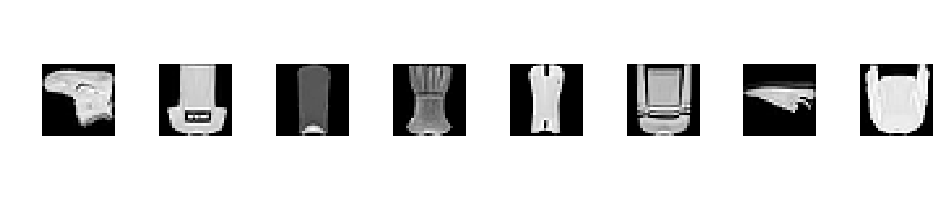

In [51]:
u4.display_FashionMNIST(train_set_flipped)

# Answer
- Picture 1: Shoe
- Picture 2: T-Shirt
- Picture 3: Dress
- Picture 4: Dress
- Picture 5: Shoe
- Picture 6: Backpack
- Picture 7: Shoe
- Picture 8: Longsleeve

Some pictures like no. 4 or the backpack in no. 6 could be interpreted in different ways then "unflipped".

In [47]:
test_loader_flipped = torch.utils.data.DataLoader(test_set_flipped, batch_size=1000, shuffle=True)

In [52]:
print(f"LogisticRegression(), Model: model_1\n, Arguments: {args00}")
u4.test(args00, model_1, device, test_loader_flipped, input_dim)

print(f"LogisticRegression(), Model: model1_01, Arguments: {args01}\n")
u4.test(args01, model1_01, device, test_loader_flipped, input_dim)

print(f"LogisticRegression(), Model: model1_02, Arguments: {args02}\n")
u4.test(args02, model1_02, device, test_loader_flipped, input_dim)

print(f"LogisticRegression(), Model: model1_03, Arguments: {args03}\n")
u4.test(args03, model1_03, device, test_loader_flipped, input_dim)

print(f"LogisticRegression(), Model: model1_04, Arguments: {args04}\n")
u4.test(args04, model1_04, device, test_loader_flipped, input_dim)

print(f"LogisticRegression(), Model: model1_05, Arguments: {args05}\n")
u4.test(args05, model1_05, device, test_loader_flipped, input_dim)

print(f"LogisticRegression(), Model: model1_06, Arguments: {args06}\n")
u4.test(args06, model1_06, device, test_loader_flipped, input_dim)

print(f"LogisticRegression(), Model: model1_07, Arguments: {args07}\n")
u4.test(args07, model1_07, device, test_loader_flipped, input_dim)

print(f"LogisticRegression(), Model: model1_08, Arguments: {args08}\n")
u4.test(args08, model1_08, device, test_loader_flipped, input_dim)

print(f"LogisticRegression(), Model: model1_09, Arguments: {args09}\n")
u4.test(args09, model1_09, device, test_loader_flipped, input_dim)


print(f"DenseNeuralNet(), Model: model_2, Arguments: {args00}")
u4.test(args2_00, model_2, device, test_loader_flipped, input_dim)

print(f"DenseNeuralNet(), Model: model2_01, Arguments: {args2_01}\n")
u4.test(args2_01, model2_01, device, test_loader_flipped, input_dim)

print(f"DenseNeuralNet(), Model: model2_02, Arguments: {args2_02}\n")
u4.test(args2_02, model2_02, device, test_loader_flipped, input_dim)

print(f"DenseNeuralNet(), Model: model2_03, Arguments: {args2_03}\n")
u4.test(args2_03, model2_03, device, test_loader_flipped, input_dim)

print(f"DenseNeuralNet(), Model: model2_04, Arguments: {args2_04}\n")
u4.test(args2_04, model2_04, device, test_loader_flipped, input_dim)

print(f"DenseNeuralNet(), Model: model2_05, Arguments: {args2_05}\n")
u4.test(args2_05, model2_05, device, test_loader_flipped, input_dim)

print(f"DenseNeuralNet(), Model: model2_06, Arguments: {args2_06}\n")
u4.test(args2_06, model2_06, device, test_loader_flipped, input_dim)

print(f"DenseNeuralNet(), Model: model2_07, Arguments: {args2_07}\n")
u4.test(args2_07, model2_07, device, test_loader_flipped, input_dim)

print(f"DenseNeuralNet(), Model: model2_08, Arguments: {args2_08}\n")
u4.test(args2_08, model2_08, device, test_loader_flipped, input_dim)

print(f"DenseNeuralNet(), Model: model2_09, Arguments: {args2_09}\n")
u4.test(args2_09, model2_09, device, test_loader_flipped, input_dim)

LogisticRegression(), Model: model_1
, Arguments: namespace(batch_size=64, epochs=10, log_interval=100, lr=0.001, momentum=0.9, seed=42, test_batch_size=1000)

Test set: Average loss: 0.0024, Accuracy: 3370/10000 (33.70%)

LogisticRegression(), Model: model1_01, Arguments: namespace(batch_size=64, epochs=10, log_interval=100, lr=1e-10, momentum=0.9, test_batch_size=1000)


Test set: Average loss: 0.0023, Accuracy: 1044/10000 (10.44%)

LogisticRegression(), Model: model1_02, Arguments: namespace(batch_size=64, epochs=10, log_interval=100, lr=1, momentum=0.9, test_batch_size=1000)


Test set: Average loss: 0.0487, Accuracy: 1697/10000 (16.97%)

LogisticRegression(), Model: model1_03, Arguments: namespace(batch_size=64, epochs=10, log_interval=100, lr=10000, momentum=0.9, test_batch_size=1000)


Test set: Average loss: 564.3575, Accuracy: 2073/10000 (20.73%)

LogisticRegression(), Model: model1_04, Arguments: namespace(batch_size=64, epochs=1, log_interval=100, lr=0.001, momentum=0.9, tes

# Answer
Yes!

- At first, it looks like the LogisticRegression-model computes a little bit better results then the DenseNeuralNet. This could be because the DenseNeuralNet has more layers, therefore it is more complicated and not that flexible. The LogisitcRegression on the other hand is simpler and could be used more flexible (same principle as over- and underfitting).
- Moreover, fewer epochs are also leading to better results at the flipped test-set. In my opinion, this is because with fewer epochs, the model is also less fitted to the training set, therefore more flexible.
- Regarding the LogisticRegression, a higher learning rate leads to a better result on the flipped test-set (with an exception of the learning rate 0.001, where the results are the best). This is not the case with the DenseNeuralNet, because as seen above, from a certain learning rate on, the model performes very bad in general, therefore also on the flipped test-set.